In [1]:
import json as js
import os
import glob
import matplotlib.pyplot as plt
import numpy as np

In [2]:
old_json = '/Volumes/NEXT_data/IC_Data/krThesis/sliding_window_events/meshed_outputs_20210113/meshed_output_allfiles_7479_20210112.json'
new_json = '/Volumes/NEXT_data/IC_Data/krThesis/sliding_window_events/meshed_outputs_20210222/meshed_output_allfiles_7479_d210217_multiple_events_buffer_20210219.json'

In [3]:
# Load in the old json...
of = open(old_json)
oj = js.load(of)
of.close()
    
# ... and the corresponding new one
nf = open(new_json)
nj = js.load(nf)
nf.close()

In [4]:
oj.keys()

dict_keys(['events_energy', 'events_prewindow_sums', 'all_Zgauss', 'all_Wgauss', 'all_Zrms', 'all_Wrms', 'events_X_sipm_subtracted', 'events_Y_sipm_subtracted', 'events_localit_X', 'events_localit_Y', 'events_local_X', 'events_local_Y', 'events_global_X', 'events_global_Y', 'ring_events_sipm_aroundevt', 'ring_events_sipm_aroundevt_noctr', 'all_R2', 'events_postwindow_sums', 'all_sres', 'all_ssres', 'all_cutoff'])

In [5]:
nj.keys()

dict_keys(['events_energy', 'events_prewindow_sums', 'all_Zgauss', 'all_Wgauss', 'all_Zrms', 'all_Wrms', 'events_X_sipm_subtracted', 'events_Y_sipm_subtracted', 'events_localit_X', 'events_localit_Y', 'events_local_X', 'events_local_Y', 'events_global_X', 'events_global_Y', 'ring_events_sipm_aroundevt', 'ring_events_sipm_aroundevt_noctr', 'all_R2', 'events_postwindow_sums', 'all_sres', 'all_ssres', 'all_cutoff', 'event_time_bounds', 'events_energy_ideal_window', 'events_prewindow_sums_ideal_window_rescaled', 'events_energy_ideal_window_subtracted'])

In [6]:
print('Comparing old vs new compactified files, major new addition is multiple events per waveform.')
print('New method:')
print(round(len(nj['events_energy'])/1000,1), 'k events')
print('Old method:')
print(round(len(oj['events_energy'])/1000,1), 'k events')
print('Change of', round(100*((len(nj['events_energy'])-len(oj['events_energy']))/len(oj['events_energy'])),1), '%')

Comparing old vs new compactified files, major new addition is multiple events per waveform.
New method:
1031.5 k events
Old method:
697.1 k events
Change of 48.0 %


In [7]:
ox, oy, oz = np.array(oj['events_localit_X']), np.array(oj['events_localit_Y']), np.array(oj['all_Zgauss'])
oe = np.array(oj['events_energy']) - np.array(oj['events_prewindow_sums'])
nx, ny, nz = np.array(nj['events_localit_X']), np.array(nj['events_localit_Y']), np.array(nj['all_Zgauss'])
ne = np.array(nj['events_energy_ideal_window_subtracted'])

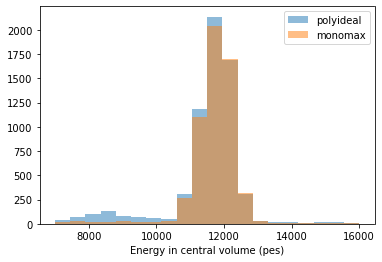

In [32]:
ncenter = ((nx**2 + ny**2) < 100**2) & (nz < 100)
ocenter = ((ox**2 + oy**2) < 100**2) & (oz < 100)

plt.hist(ne[ncenter], range = (7000, 16000), bins = 20, alpha=0.5, label = 'polyideal')
plt.hist(oe[ocenter], range = (7000, 16000), bins = 20, alpha=0.5, label = 'monomax')
plt.xlabel('Energy in central volume (pes)')
plt.legend()
plt.show()

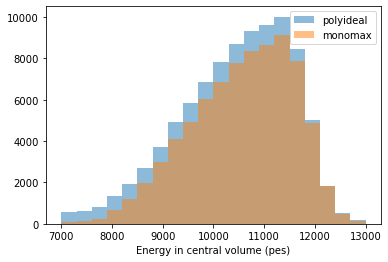

In [33]:
ncenter = ((nx**2 + ny**2) < 180**2) & (nz < 500)
ocenter = ((ox**2 + oy**2) < 180**2) & (oz < 500)

plt.hist(ne[ncenter], range = (7000, 13000), bins = 20, alpha=0.5, label = 'polyideal')
plt.hist(oe[ocenter], range = (7000, 13000), bins = 20, alpha=0.5, label = 'monomax')
plt.xlabel('Energy in central volume (pes)')
plt.legend()
plt.show()

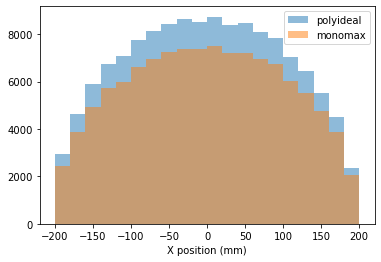

In [34]:
necut = (ne > 7000) & (ne < 13000)
oecut = (oe > 7000) & (oe < 13000)

plt.hist(nx[necut], range = (-200, 200), bins = 20, alpha=0.5, label = 'polyideal')
plt.hist(ox[oecut], range = (-200, 200), bins = 20, alpha=0.5, label = 'monomax')
plt.xlabel('X position (mm)')
plt.legend()
plt.show()

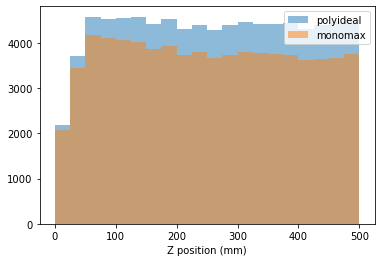

In [35]:
nrcut = (nx**2 + ny**2) < 180**2
orcut = (ox**2 + oy**2) < 180**2

plt.hist(nz[necut & nrcut], range = (0, 500), bins = 20, alpha=0.5, label = 'polyideal')
plt.hist(oz[oecut & orcut], range = (0, 500), bins = 20, alpha=0.5, label = 'monomax')
plt.xlabel('Z position (mm)')
plt.legend()
plt.show()

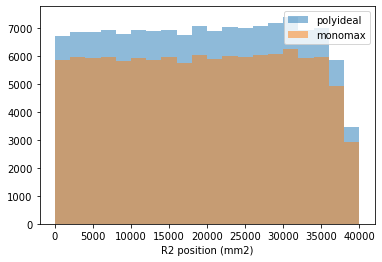

In [36]:
plt.hist((nx**2+ny**2)[necut], range = (0, 40000), bins = 20, alpha=0.5, label = 'polyideal')
plt.hist((ox**2+oy**2)[oecut], range = (0, 40000), bins = 20, alpha=0.5, label = 'monomax')
plt.xlabel('R2 position (mm2)')
plt.legend()
plt.show()